In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Exercice 1 : Une première regression linéaire

La régression linéaire est sans aucun doute l’algorithme de Machine Learning (ML) le plus simple qui soit. Comme
tous les algorithmes de ML, il est instancié à partir d’exemples , et permet ensuite de généraliser à de nouvelles données.
Ce modèle est suffisamment simple pour qu’une solution mathématique immédiate existe dans tous les cas. Il "suffit" de calibrer le modèle et non de l’entraîner comme avec les réseaux de neurones ou les approches basées sur
l’apprentissage par renforcement.
En guise d’illustration on prendra ici un exemple trivial avec quelques données, qui pourraient par exemple correspondre à prédiction du poids d’un individu à partir de sa taille, la température en fonction de l’altitude, ou les ventes d’un
produit en fonction de sa qualité.
Toutes les méthodes du framework que nous allons utiliser, ScikitLearn, fonctionnent avec des np.array. La
technique d’utilisation est toujours la même:
1. récupérer les données sous forme de np.array
2. créer un modèle
3. calibrer ce modèle avec la méthode fit(...)
4. généraliser (faire des prédictions) avec la méthode predict(...)


#### Q1. Mettez en forme les observations (xi, yi) suivantes afin qu’elles soient utilisables: (5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38). Affichez-les comme nuage de points sur une grille.

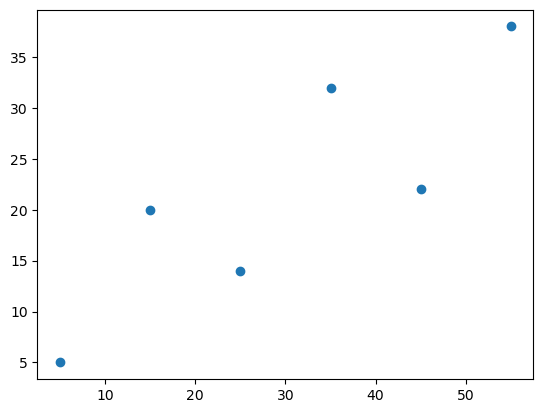

In [40]:
# (5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)

points = np.array([(5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)])
x, y = points[:,0].reshape(-1, 1), points[:,1]



plt.scatter(x, y)

#### Q2. Créez le modèle de régression qui représente le mieux ces observations, c’est-à-dire la droite minimisant l’écart avec les points.

In [41]:

linear = LinearRegression()
linear.fit(x, y)

LinearRegression()

#### Q3. Quel est l’équation de la droite obtenue ainsi ? Autrement dit, quelles sont les valeurs de la pente et de l’ordonnée à l’origine ?

In [42]:
print("intercept: " + str(linear.intercept_) + " slope: " + str(linear.coef_))

intercept: 5.633333333333333 slope: [0.54]


#### Q4. Puisque nous disposons d’un modèle, effectuons quelques prédictions. Quelles sont les valeurs prédites pour x1 = 20 et x2 = 40 ?

In [43]:
y1, y2 = linear.predict([[20], [40]])

print(y1)
print(y2)

16.43333333333333
27.23333333333333


#### Q5. Tracez la droite de régression ainsi que le nuage de points. Vérifiez que vous retrouvez bien les valeurs prédites pour les nouvelles observations données précédemment.

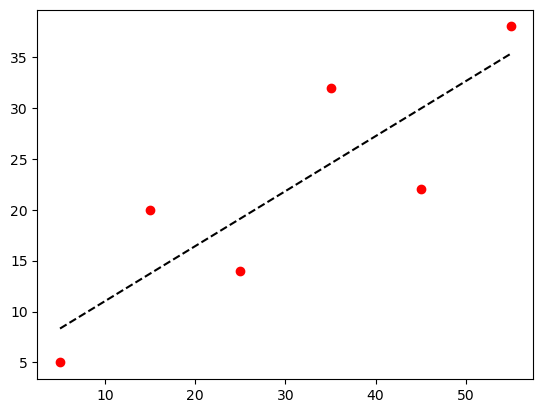

In [44]:
xRegression = np.linspace(x.min(), x.max(), 3)
yRegression = linear.predict(xRegression.reshape(-1,1))


plt.plot(x, y, 'ro')
plt.plot(xRegression, yRegression, 'black', linestyle='--')

#### Q6. Quantifiez la qualité du modèle en affichant les scores R2, MSE, RMSE et MAE.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


r2 = linear.score(x, y)
mse = mean_squared_error(y, linear.predict(x), squared=True)
rmse = mean_squared_error(y, linear.predict(x), squared=False)
mae = mean_absolute_error(y, linear.predict(x))

print(r2)
print(mse)
print(rmse)
print(mae)

0.715875613747954
33.75555555555556
5.809953145728075
5.466666666666668


## Exercice 2 : Le cas polynomial

La régression polynomiale se gère de la même manière que la régression linéaire, mais avec une étape supplémentaire. Il est en effet nécessaire de transformer le tableau des entrées pour inclure des termes non linéaires.

#### Q1. Mettez en forme les observations (xi, yi) suivantes afin qu’elles soient utilisables: (5, 15), (15, 11), (25, 2), (35, 8), (45, 25), (55, 32). Affichez-les comme nuage de points sur une grille.

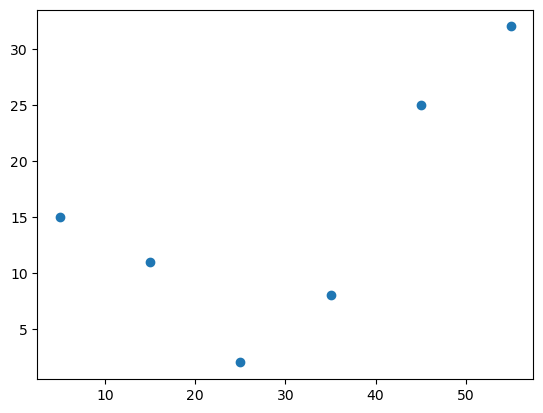

In [46]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

plt.scatter(x, y)

#### Q2. Créez le modèle de régression et calibrez-le avec les données précédentes.

In [47]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

#### Q3. Puisque nous disposons d’un modèle, effectuons quelques prédictions. Quelles sont les valeurs prédites pour x1 = 20 et x2 = 40 ?

In [48]:

y1, y2 = lin2.predict(poly.fit_transform(np.array([[20], [40]])))

print(y1)
print(y2)

6.2580357142856595
13.858035714285712


#### Q4. Affichez les coefficients du polynôme, puis calculez les scores R2, MSE, RMSE et MAE afin d’évaluer la qualité du modèle.

In [49]:
print("intercept: " + str(linear.intercept_) + " slope: " + str(linear.coef_))

R2 = lin2.score(X_poly, y)
MSE = mean_squared_error(y, lin2.predict(X_poly), squared=True)
RMSE = mean_squared_error(y, lin2.predict(X_poly), squared=False)
MAE = mean_absolute_error(y, lin2.predict(X_poly))

print(R2)
print(MSE)
print(RMSE)
print(MAE)

intercept: 5.633333333333333 slope: [0.54]
0.8908516262498563
11.305952380952393
3.3624325095014758
2.9285714285714377


#### Q5. Affichez les données initiales ainsi que le polynôme calculé.

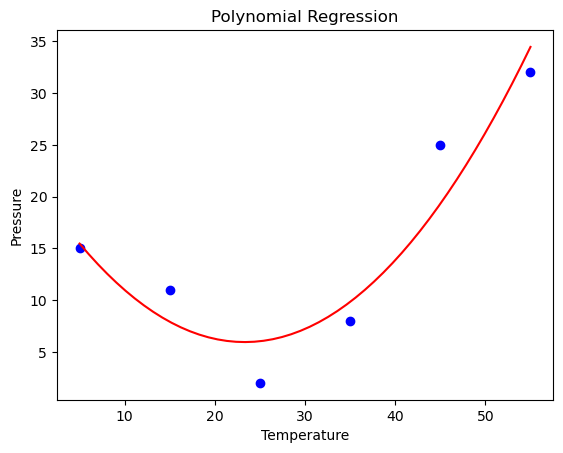

In [50]:
plt.scatter(x, y, color='blue')

xRegression = np.linspace(x.min(), x.max()).reshape(-1, 1)

plt.plot(xRegression, lin2.predict(poly.transform(xRegression)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

#### Q6. Malheureusement, vous n’avez que quelques points pour établir votre modèle.

#### Q6.1. Récupérez le fichier data_mm_additional.csv. Incorporez ces nouvelles données et évaluez la précision de votre modèle avec ces nouvelles données (R2, MSE, RMSE, MAE). Affichez finalement tous les points et le polynôme de régression.

0.32774706917786545
83.79791771244759
9.154120258793172
7.527275876907082


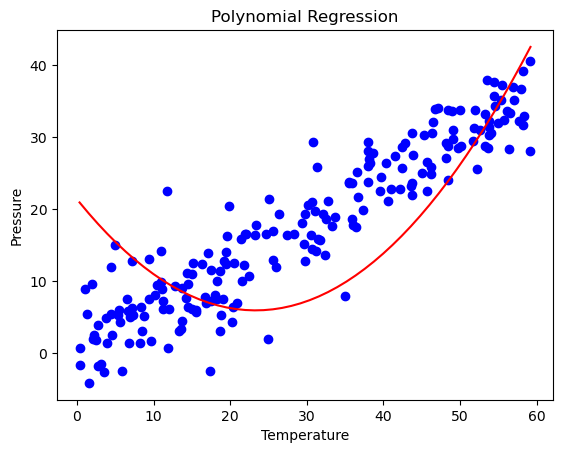

In [51]:
test = pd.read_csv('./tp_mm_05_res/data_mm_additional.csv')

x_test = test['x'].to_numpy().reshape(-1, 1)
x_test_poly = poly.transform(x_test)

y_test = test['y'].to_numpy()


R2 = lin2.score(x_test_poly, y_test)
MSE = mean_squared_error(y_test, lin2.predict(x_test_poly), squared=True)
RMSE = mean_squared_error(y_test, lin2.predict(x_test_poly), squared=False)
MAE = mean_absolute_error(y_test, lin2.predict(x_test_poly))

print(R2)
print(MSE)
print(RMSE)
print(MAE)



plt.scatter(x_test, y_test, color='blue')

xRegression = np.linspace(x_test.min(), x_test.max()).reshape(-1, 1)

plt.plot(xRegression, lin2.predict(poly.transform(xRegression)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

#### Q6.2. Trouvez un nouveau modèle si nécessaire qui obtiendrait de meilleurs résultats.

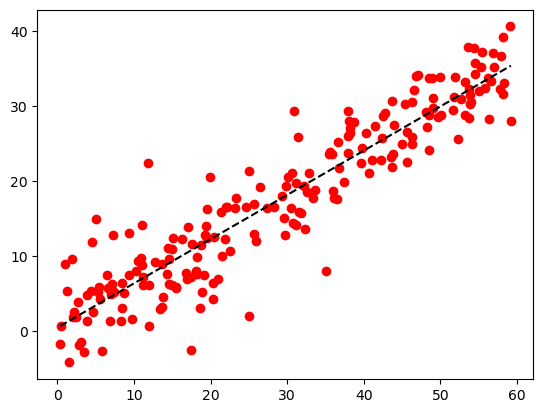

In [52]:
# utiliser le 80% pour le modele, 20% pour le test
# polynome linear
data = pd.read_csv('./tp_mm_05_res/data_mm_additional.csv')
x = data['x'].to_numpy().reshape(-1, 1)
y = data['y'].to_numpy()

linear = LinearRegression()
linear.fit(x, y)

xRegression = np.linspace(x.min(), x.max(), 3)
yRegression = linear.predict(xRegression.reshape(-1,1))


plt.plot(x, y, 'ro')
plt.plot(xRegression, yRegression, 'black', linestyle='--')

## Exercice 3 : Prédiction de loyers

Vous êtes consulté par une agence immobilière pour prédire les loyers des différents arrondissements de Paris, afin de les aider à prendre des décisions d’achat d’appartements.

#### Q1. Récupérez les données du fichier data_mm_house.csv. Affichez les 5 premières lignes du fichier pour comprendre sa structure ainsi que le nombre de lignes qu’il contient.

In [53]:
houses = pd.read_csv('./tp_mm_05_res/data_mm_house.csv')

print(houses.head(5))

print(houses.size)

   price  surface  arrondissement
0   1820     46.1             1.0
1   1750     41.0             1.0
2   1900     55.0             1.0
3   1950     46.0             1.0
4   1950     49.0             1.0
2475


#### Q2. Affichez la description statistique des données, et représentez les données sous forme d’un nuage de points pour déterminer la présence éventuelle d’outliers.

              price     surface  arrondissement
count    825.000000  820.000000      820.000000
mean    1956.450909   57.461890        4.146341
std     1581.839919   42.899154        3.204171
min      390.000000   10.000000        1.000000
25%     1050.000000   28.502500        2.000000
50%     1562.000000   46.050000        3.000000
75%     2325.000000   72.775000        4.000000
max    15600.000000  347.000000       10.000000


Text(0, 0.5, 'surface')

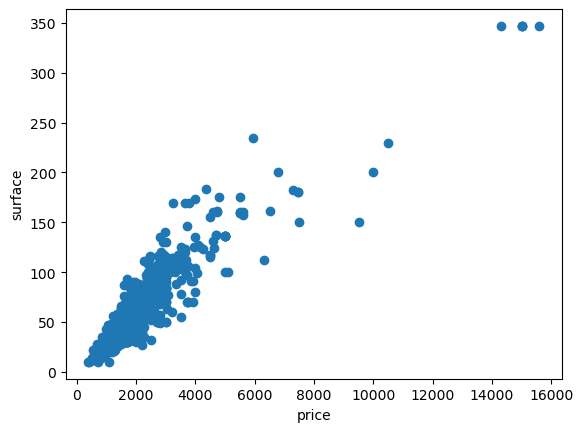

In [54]:
print(houses.describe())

plt.scatter(houses['price'], houses['surface'])
plt.xlabel('price')
plt.ylabel('surface')


#### Q3. Nettoyez les données et ignorez les outliers. Ré-affichez le nuage de points correspondant. Faites-en sorte de pouvoir distinguer les arrondissements.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price', ylabel='surface'>

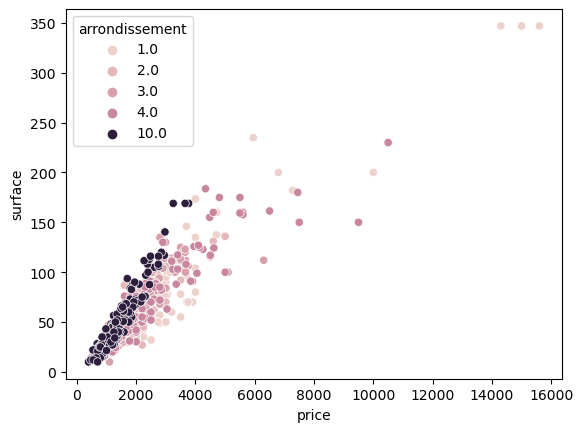

In [57]:
houses = pd.read_csv('./tp_mm_05_res/data_mm_house_cleaned.csv')

sns.scatterplot(x=houses['price'], y=houses['surface'], hue=houses['arrondissement'])

#### Q4. Représentez la répartition des prix par arrondissement. Est-elle plus ou moins semblable dans les différents arrondissements ? Où les prix sont-ils le moins élevés ?

In [58]:
# prices_averages =

sns.barplot(x=houses['arrondissement'],y=houses['price'],)

SyntaxError: invalid syntax (3655782186.py, line 1)